In [ ]:
import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

fig, axs = plt.subplots()

# axs.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
axs.pie(fracs, labels=labels, autopct='%.0f%%', shadow=True, explode=(0.1, 0.1,0,0))

In [ ]:
import akshare as ak

pe = ak.sw_index_first_info()
# pe2 = ak.stock_a_pe(symbol='000016.XSHG')


pe.to_csv("sw_pe.csv")
print(pe)
# print(pe2)

In [ ]:
id = ak.index_level_one_hist_sw('801010')
print(id)

In [27]:
lrb = ak.stock_lrb_em(date="20220331")

In [26]:
lrb.to_csv("./lrb.csv")

In [30]:
lrb.loc[lrb["股票代码"] == "000858"]

,序号,股票代码,股票简称,净利润,净利润同比,营业总收入,营业总收入同比,营业总支出-营业支出,营业总支出-销售费用,营业总支出-管理费用,营业总支出-财务费用,营业总支出-营业总支出,营业利润,利润总额,公告日期
2082,2083,000858,五粮液,1.082287e+10,16.08,2.754816e+10,13.251148,5.948172e+09,2.033172e+09,9.804271e+08,-5.133086e+08,1.240055e+10,1.516849e+10,1.513640e+10,2022-04-29


In [ ]:
gdp = ak.macro_china_gdp()
print(gdp)

: 

In [4]:
div = ak.stock_history_dividend()

In [8]:
# print(div[div['代码'] == '000858'])
print(div)

          代码    名称        上市日期   累计股息  年均股息  分红次数      融资总额  融资次数
0     000550  江铃汽车  1993-12-01  202.1  6.97    47    0.0000     0
1     000541  佛山照明  1993-11-23  182.9  6.31    52    0.0000     0
2     000429  粤高速A  1998-02-20  148.9  5.96    46   16.3350     1
3     000726   鲁泰A  2000-12-25  136.7  6.22    43    9.5082     1
4     000022  深赤湾A  1993-05-05  132.3  5.09    45    0.0000     0
...      ...   ...         ...    ...   ...   ...       ...   ...
4611  688789  宏华数科  2021-07-08    0.0  0.00     0    5.0340     1
4612  688798  艾为电子  2021-08-16    0.0  0.00     0   30.3526     1
4613  688799  华纳药厂  2021-07-13    0.0  0.00     0    6.5566     1
4614  688800   瑞可达  2021-07-22    0.0  0.00     0    3.4983     1
4615  688981  中芯国际  2020-07-16    0.0  0.00     0  525.1560     1

[4616 rows x 8 columns]


In [ ]:
# Annualized standard deviation (volatility) of monthly return
# 月收益率的年化标准差（波动率）
# 实证研究表明，收益率标准差（波动率）存在一定的集聚现象，
# 即高波动率和低波动率往往会各自聚集在一起，并且高波动率和低波动率聚集的时期是交替出现的。
# 红色部门显示出，所有股票均存在一定的波动集聚现象。
fig = plt.figure(figsize = (16,15))
for ii,jj in enumerate(tickers):
    plt.subplot(5,2,ii+1)
    daily_ret=stocks[jj].pct_change()
    mnthly_annu = daily_ret.resample('M').std()* np.sqrt(12)
    #plt.rcParams['figure.figsize']=[20,5]
    mnthly_annu.plot(color=color_palette[ii],label=jj)
    start_date=mnthly_annu.index[0]
    end_date=mnthly_annu.index[-1]
    plt.xticks(pd.date_range(start_date,end_date,freq='Y'),[str(y) for y in range(start_date.year+1,end_date.year+1)])
    dates=mnthly_annu[mnthly_annu>0.07].index
    for i in range(0,len(dates)-1,3):
        plt.axvspan(dates[i],dates[i+1],color=color_palette[ii],alpha=.3)
    plt.title('%s - Standard deviation of monthly rate of return'%jj,size=15)
    labs = mpatches.Patch(color=color_palette[ii],alpha=.5, label="Volatility agglomeration")
    plt.legend(handles=[labs])
plt.tight_layout()

: 

In [79]:
import akshare as ak
import pandas as pd

fin_report = ak.stock_financial_report_sina(stock="000568", symbol="资产负债表")

fin_report.to_csv("000568_bala.csv", encoding="utf_8_sig")
# fin_report_all = pd.DataFrame({"cash": fin_report["货币资金"]}, index=pd.to_datetime(fin_report["报表日期"])

In [ ]:
import numpy as np
import pandas as pd
import akshare as ak

df = pd.read_csv('bj_industry.csv', header=None)
code = df[0].str.split('.', n=1, expand=True)

profit = pd.DataFrame()
total_mv = pd.DataFrame()
for i in range(len(code)):
    print(code.iloc[i, 0])
    lg_ind = ak.stock_a_lg_indicator(symbol=code.iloc[i, 0])
    profit[code.iloc[i, 0]] = pd.Series(list(lg_ind['total_mv'] / lg_ind['pe_ttm']), index=pd.to_datetime(lg_ind['trade_date']))
    total_mv[code.iloc[i, 0]] = pd.Series(list(lg_ind['total_mv']), index=pd.to_datetime(lg_ind['trade_date']))


print(profit.to_csv("bj_profit.csv"))
profit_sum = profit.sum(axis=1)
mv_sum = total_mv.sum(axis=1)

pe_ttm = mv_sum / profit_sum
pe_ttm.plot(kind='line')

In [128]:
import numpy as np
import pandas as pd
import akshare as ak
from tqdm import tqdm

def industry_pe(industry: str):
    stocks = ak.stock_board_industry_cons_ths(symbol=industry)

    all_stock = pd.DataFrame()

    stock_len = len(stocks)
    # 生成excel表格
    # sheet_writer = pd.ExcelWriter(f'{industry}_pe.xlsx')

    for i in tqdm(range(stock_len)):
        # market = 'sz'
        code = stocks.loc[i, "代码"]
        name = stocks.loc[i, "名称"]
        lg_ind = ak.stock_a_lg_indicator(symbol=code)
        lg_ind = lg_ind[lg_ind['pe_ttm'].notnull()]
        lg_ind['code'] = code
        lg_ind['net_profit'] = lg_ind['total_mv'] / lg_ind['pe_ttm']
        all_stock = pd.concat([all_stock, lg_ind], ignore_index=True)

    out = all_stock.groupby('trade_date')[['total_mv', 'net_profit']].sum()
    out['stock_size'] = all_stock.groupby('trade_date').size()
    out['average_pe'] = out['total_mv'] / out['net_profit']

    return out

industry = "白酒"
# out['average_pe'].plot(kind='line', figsize=(26, 20))
# pe_ttm.plot(kind='line', figsize=(26, 16))

100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


In [129]:
import datetime 

all_stock[all_stock['trade_date'] == datetime.date(2023, 1, 6)]

,trade_date,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,code,net_profit
2071,2023-01-06,33.8922,28.5148,6.4618,10.7363,9.0623,1.0696,1.0696,6.877169e+06,603369,2.411789e+05
7490,2023-01-06,39.3163,33.4784,8.4479,11.8719,10.2739,1.3251,1.3251,5.433600e+06,603198,1.623017e+05
12216,2023-01-06,31.6246,28.3917,6.8884,11.1660,10.2299,1.5872,1.5872,7.392911e+07,000858,2.603899e+06
15407,2023-01-06,33.4490,26.8095,5.3282,9.9062,8.4015,1.7996,1.7996,2.511245e+07,002304,9.366996e+05
19652,2023-01-06,67.0442,52.1947,8.5609,11.6098,9.6698,0.7548,0.7548,1.540605e+07,000596,2.951650e+05
24456,2023-01-06,66.0137,46.5022,17.3620,17.5640,14.1110,0.6261,0.6261,3.507711e+07,600809,7.543108e+05
28423,2023-01-06,137.8857,320.0593,16.4323,14.1536,9.1073,0.0000,NaN,8.539005e+05,600696,2.667945e+03
33207,2023-01-06,43.1926,38.0223,12.6455,21.3381,19.0879,2.4163,2.4163,2.265892e+08,600519,5.959376e+06
34779,2023-01-06,NaN,449.7536,23.0684,32.6816,18.7904,0.0000,NaN,2.976906e+05,000995,6.618971e+02
39525,2023-01-06,43.3989,34.8843,10.8473,16.7260,14.3517,1.3827,1.3827,3.452624e+07,000568,9.897359e+05


<AxesSubplot: xlabel='trade_date'>

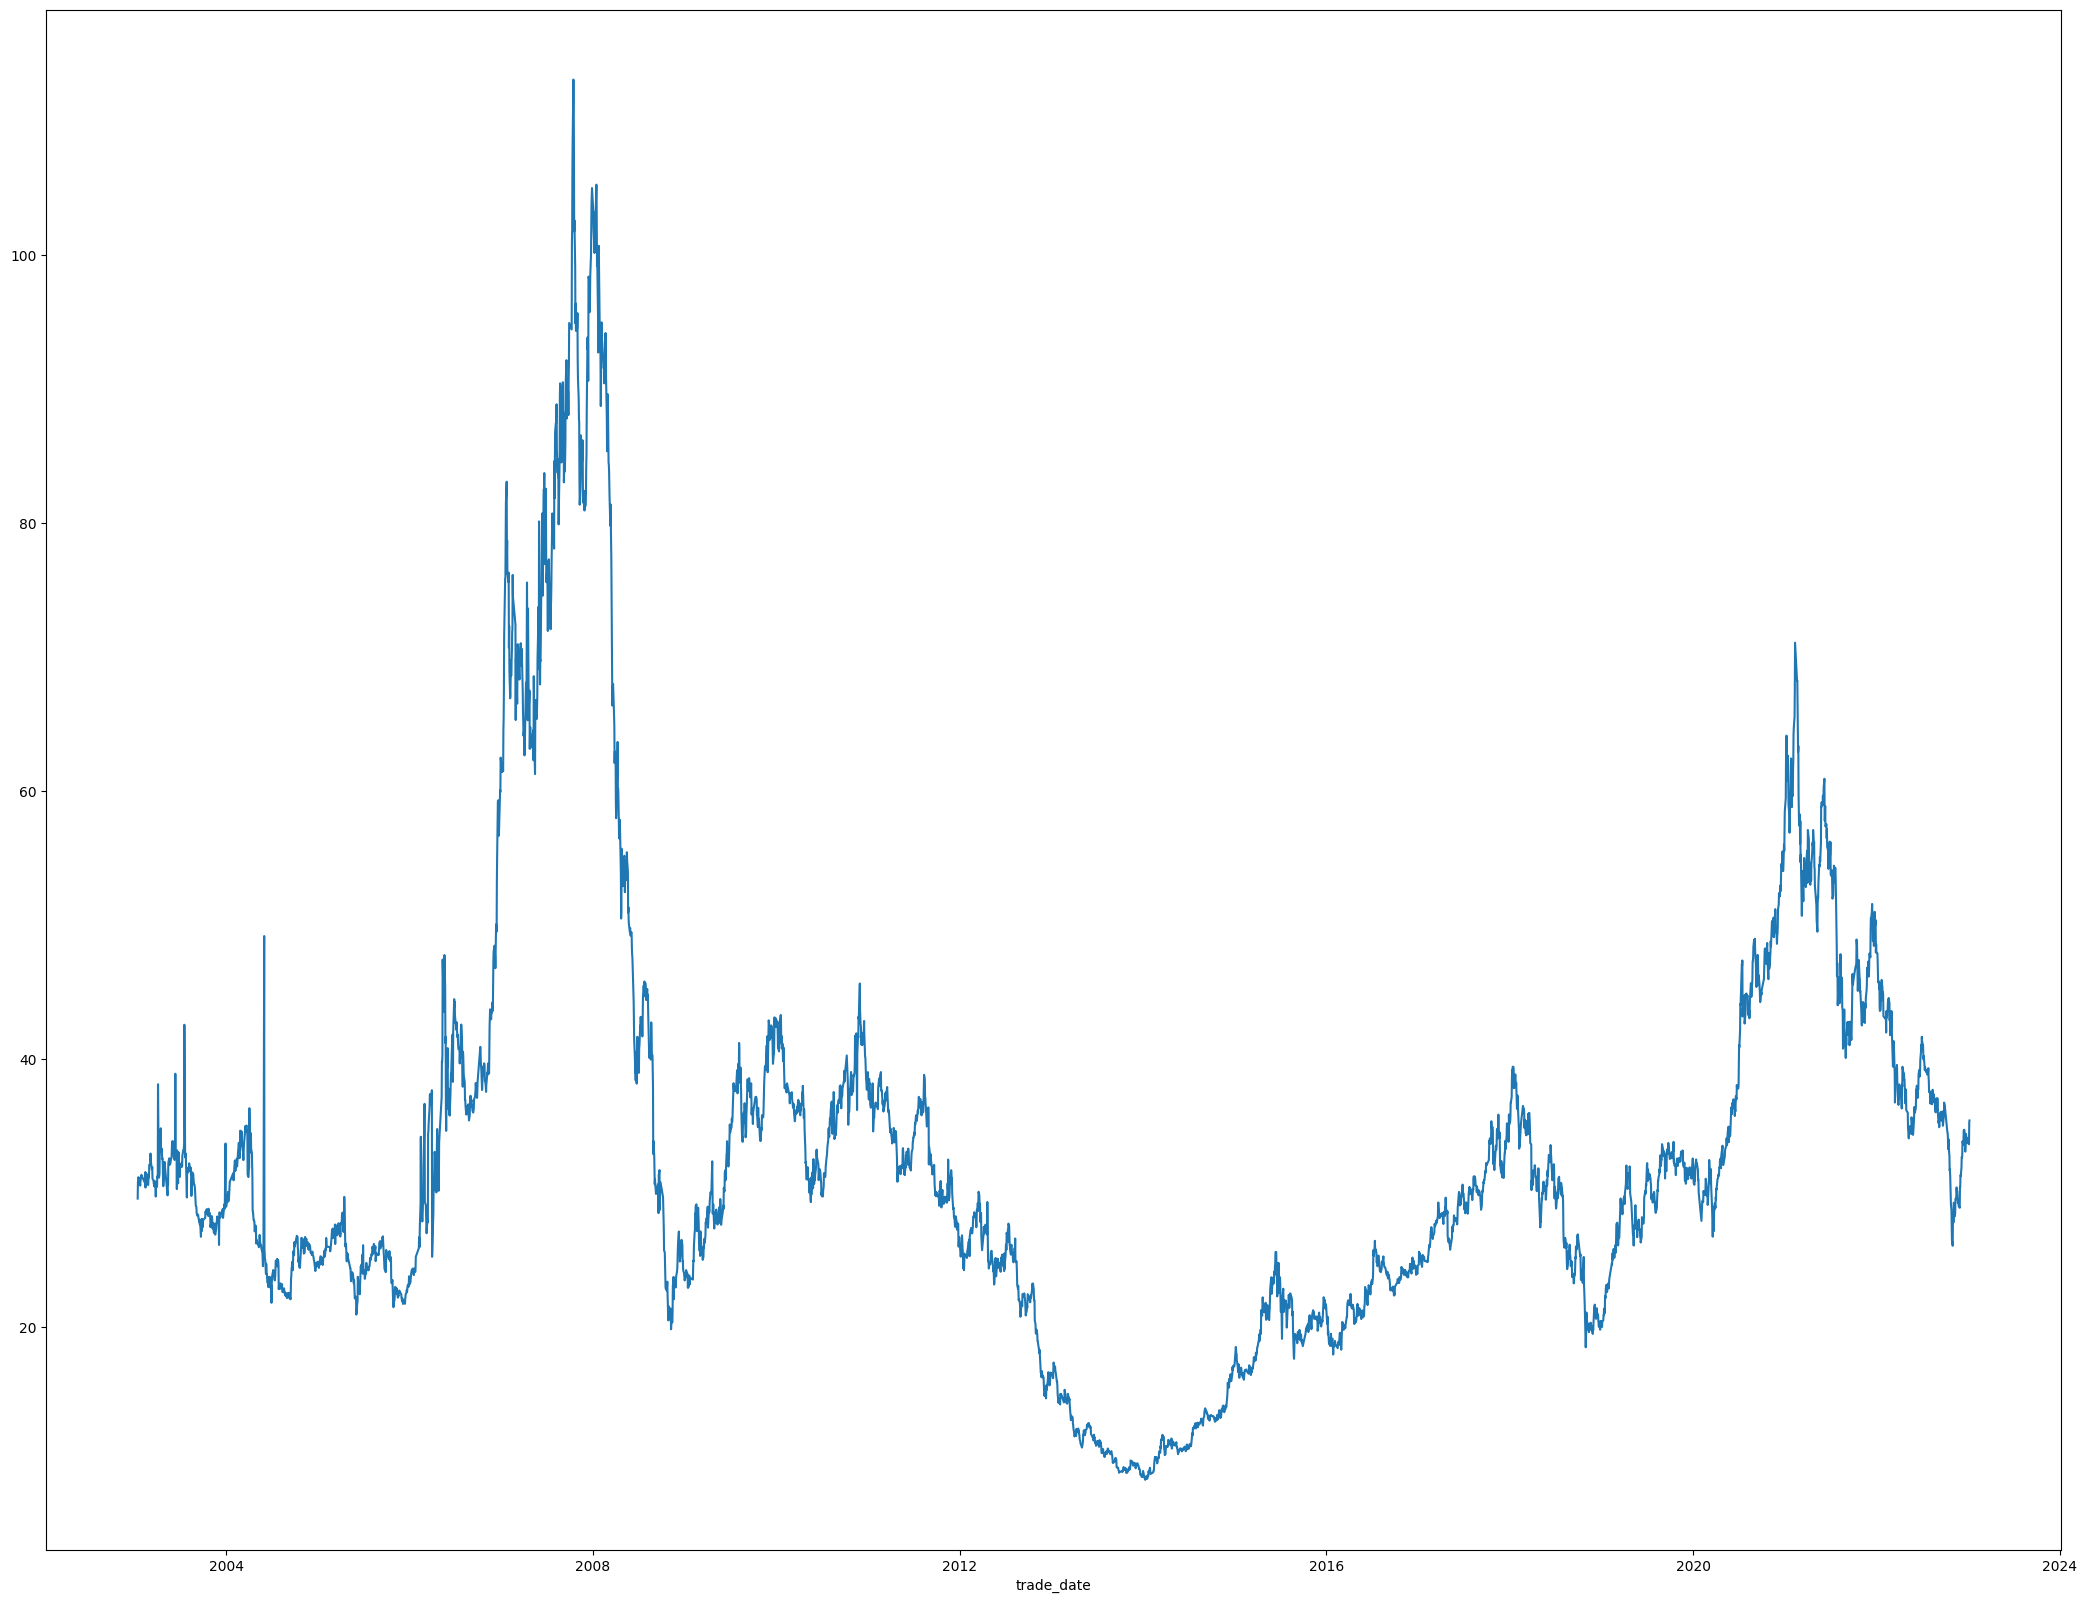

In [132]:
out = all_stock.groupby('trade_date')[['total_mv', 'net_profit']].sum()
out['stock_size'] = all_stock.groupby('trade_date').size()

out['average_pe'] = out['total_mv'] / out['net_profit']

out['average_pe'].plot(kind='line', figsize=(26, 20))

In [134]:
out = all_stock.groupby('trade_date')[['total_mv', 'net_profit']].sum()
out['stock_size'] = all_stock.groupby('trade_date').size()

out['average_pe'] = out['total_mv'] / out['net_profit']

print(out)

                total_mv    net_profit  stock_size  average_pe
trade_date                                                    
2003-01-13  4.676920e+06  1.581097e+05          13   29.580210
2003-01-14  4.876996e+06  1.581099e+05          13   30.845604
2003-01-15  4.844057e+06  1.581097e+05          13   30.637311
2003-01-16  4.929854e+06  1.581098e+05          13   31.179932
2003-01-17  4.905572e+06  1.581099e+05          13   31.026354
...                  ...           ...         ...         ...
2022-12-30  4.288190e+08  1.263459e+07          18   33.940079
2023-01-03  4.250010e+08  1.263458e+07          18   33.637908
2023-01-04  4.250953e+08  1.263459e+07          18   33.645369
2023-01-05  4.461805e+08  1.263458e+07          18   35.314226
2023-01-06  4.473901e+08  1.263459e+07          18   35.409953

[4855 rows x 4 columns]


In [133]:
print(out['average_pe'].describe())

count    4855.000000
mean       32.950652
std        16.454723
min         8.611900
25%        23.739954
50%        30.071322
75%        37.465809
max       113.089156
Name: average_pe, dtype: float64


In [118]:
fin_report_all = pd.DataFrame(
    # np.random.randn(204,1),
    columns=["000568"],
    index=pd.MultiIndex.from_product(
        [pd.to_datetime(fin_report["报表日期"]), ['应收账款','货币资金']]
    )
)


# fin_report_all['应收账款'] = fin_report['应收账款'].values


In [120]:
fin_report_all.loc[(slice(None), "货币资金"), "000568"] = fin_report['货币资金'].values

In [121]:
fin_report_all

000568
报表日期                           
2022-09-30 应收账款             NaN
           货币资金  13684458440.06
2022-06-30 应收账款             NaN
           货币资金  17046109916.36
2022-03-31 应收账款             NaN
...                         ...
1993-12-31 货币资金     10208193.51
1992-12-31 应收账款             NaN
           货币资金     12212974.18
1991-12-31 应收账款             NaN
           货币资金      6558584.36

[204 rows x 1 columns]

In [117]:
print(np.random.randn(8, 2))

[[-0.04725359 -0.69038977]
 [ 0.96786149  0.104812  ]
 [-0.42278983 -0.23637462]
 [ 0.11975571 -0.30425013]
 [-2.04443586 -0.3294943 ]
 [-1.60481487  0.74316892]
 [-0.22306208  1.66595907]
 [ 0.993015   -1.32998166]]


In [6]:
print(fin_report.columns)
# pd.MultiIndex.from_frame(fin_report)

Index(['报表日期', '单位', '流动资产', '货币资金', '交易性金融资产', '衍生金融资产', '应收票据及应收账款', '应收票据',
       '应收账款', '应收款项融资', '预付款项', '其他应收款(合计)', '应收利息', '应收股利', '其他应收款',
       '买入返售金融资产', '存货', '划分为持有待售的资产', '一年内到期的非流动资产', '待摊费用', '待处理流动资产损益',
       '其他流动资产', '流动资产合计', '非流动资产', '发放贷款及垫款', '可供出售金融资产', '持有至到期投资', '长期应收款',
       '长期股权投资', '投资性房地产', '在建工程(合计)', '在建工程', '工程物资', '固定资产及清理(合计)', '固定资产净额',
       '固定资产清理', '生产性生物资产', '公益性生物资产', '油气资产', '使用权资产', '无形资产', '开发支出', '商誉',
       '长期待摊费用', '递延所得税资产', '其他非流动资产', '非流动资产合计', '资产总计', '流动负债', '短期借款',
       '交易性金融负债', '应付票据及应付账款', '应付票据', '应付账款', '预收款项', '应付手续费及佣金', '应付职工薪酬',
       '应交税费', '其他应付款(合计)', '应付利息', '应付股利', '其他应付款', '预提费用', '一年内的递延收益',
       '应付短期债券', '一年内到期的非流动负债', '其他流动负债', '流动负债合计', '非流动负债', '长期借款', '应付债券',
       '租赁负债', '长期应付职工薪酬', '长期应付款(合计)', '长期应付款', '专项应付款', '预计非流动负债', '递延所得税负债',
       '长期递延收益', '其他非流动负债', '非流动负债合计', '负债合计', '所有者权益', '实收资本(或股本)', '资本公积',
       '减：库存股', '其他综合收益', '专项储备', '盈余公积', '一般风险准备', '未分配利润', '归属于母公司股东权益合计',
   